# 단순 선형회귀

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 아버지와 아들의 키 - Galton

In [30]:
df = pd.read_csv('http://www.randomservices.org/random/data/Galton.txt',sep = '\t')
df.head()

,Family,Father,Mother,Gender,Height,Kids
0,1,78.5,67.0,M,73.2,4
1,1,78.5,67.0,F,69.2,4
2,1,78.5,67.0,F,69.0,4
3,1,78.5,67.0,F,69.0,4
4,2,75.5,66.5,M,73.5,4


- 아버지와 아들의 키만 발췌
- 컬렴명을 Father, Son으로 변경
- 단위 변경 (inch --> cm)

In [31]:
# 아들의 키
df = df[df.Gender == 'M']
df.head()

,Family,Father,Mother,Gender,Height,Kids
0,1,78.5,67.0,M,73.2,4
4,2,75.5,66.5,M,73.5,4
5,2,75.5,66.5,M,72.5,4
8,3,75.0,64.0,M,71.0,2
10,4,75.0,64.0,M,70.5,5


In [32]:
df = df[['Father','Height']]
df.head()

,Father,Height
0,78.5,73.2
4,75.5,73.5
5,75.5,72.5
8,75.0,71.0
10,75.0,70.5


In [33]:
# df.rename(columns ={'Height','Son'}, inplace= True)
df.columns =['Father','Son']

In [34]:
df = df*2.54
df.head()

,Father,Son
0,199.39,185.928
4,191.77,186.690
5,191.77,184.150
8,190.50,180.340
10,190.50,179.070


- 산점도 그리기

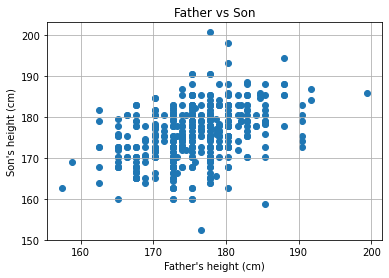

In [35]:
plt.scatter(df.Father, df.Son)
plt.grid()
plt.xlabel("Father's height (cm)")
plt.ylabel("Son's height (cm)")
plt.title("Father vs Son")
plt.show()

- 회귀선 구하고 그리기
  - np.linalg.lstsq()
  - np.polyfit()

In [64]:
weight, bias = np.polyfit(df.Father, df.Son, 1)   # X,Y, 차수
weight, bias

(0.447747917603028, 97.17763700739309)

In [65]:
# 회귀식을 2차식으로
np.polyfit(df.Father, df.Son, 2)

array([6.10561389e-04, 2.32817725e-01, 1.16071746e+02])

In [66]:
xs = np.array([156,201])
ys = xs + weight + bias
ys

array([253.62538492, 298.62538492])

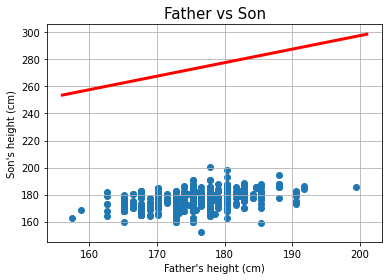

In [67]:
plt.scatter(df.Father, df.Son)
plt.plot(xs, ys, 'r-', lw=3)
plt.grid()
plt.xlabel("Father's height (cm)")
plt.ylabel("Son's height (cm)")
plt.title('Father vs Son', fontsize=15)
plt.show()

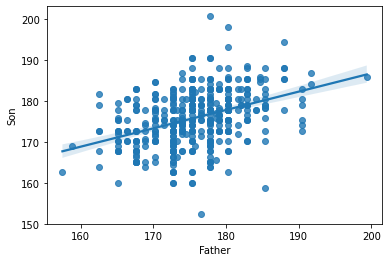

In [44]:
import seaborn as sns
sns.regplot(x='Father', y='Son', data=df);

- Scikit-learn으로 회귀식 구하기

In [45]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [46]:
df.shape

(465, 2)

In [48]:
# 학습 메소드
lr.fit(df[['Father']], df.Son)

LinearRegression()

In [50]:
lr.fit(df.Father.values.reshape(-1,1),df.Son.values)

LinearRegression()

In [53]:
# coefficient(계수), weight
lr.coef_

array([0.44774792])

In [52]:
# intercept(절편), bias
lr.intercept_

97.17763700739341

In [55]:
# 잔차 제곱의 합(RSS: Residual Sum of Square)
lr._residues

17556.59951549399

In [56]:
# 평가 - R squared
lr.score(df.Father.values.reshape(-1,1), df.Son.values)

0.15312927478307048

In [58]:
from sklearn.metrics import r2_score
pred = lr.predict(df.Father.values.reshape(-1,1))
r2_score(df.Son.values, pred)

0.15312927478307048